# Implement an End to End CNN Model for Image Classification Task.

# Task 1: Data Understanding and Visualization:
Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.

• Select one image randomly from each class.

• Display the images in a grid format with two rows using matplotlib.

In [ ]:
from google.colab import drive

#mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train image data
train_df = "/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 5/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 5/FruitinAmazon/test"

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image

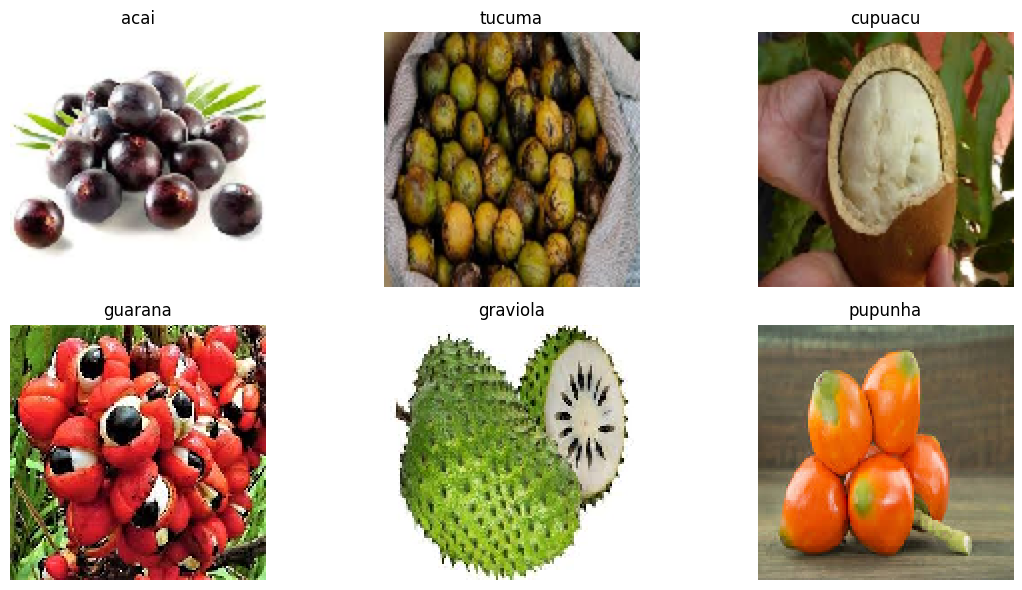

In [ ]:
def visualize_images(dataset_path):
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    fig, axes = plt.subplots(2, len(class_dirs)//2, figsize=(12, 6))
    axes = axes.flatten()

    for i, class_name in enumerate(class_dirs):
        class_path = os.path.join(dataset_path, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(128, 128))
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_images(train_df)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

• Hint:

– Iterate through each class subdirectory and check if each image is valid.

– Use the Image.open() function to attempt to load each image.

– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".

– Maintain a list of all corrupted image paths for reporting.

• Expected Output: No corrupted images found.

In [ ]:
from PIL import Image

In [ ]:
def check_corrupted_images(dataset_path):
    corrupted_images = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                os.remove(img_path)
                corrupted_images.append(img_path)

    if corrupted_images:
        for img in corrupted_images:
            print(f"Removed corrupted image: {img}")
    else:
        print("No Corrupted Images Found.")

check_corrupted_images(train_df)

No Corrupted Images Found.


# Task 2: Loading and Preprocessing Image Data in keras:
In this section, we will load and preprocess image data from a directory using the:
>image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different classes. We will also apply basic preprocessing, including resizing and batching and normalization of images. The same function can be used to load train and validation data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:

> Convolutional Architecture:
• Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

> • Activation Layer: ReLU activation

> • Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

> • Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

> • Activation Layer: ReLU activation

> • Pooling Layer 2: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

> Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Task 4: Compile the Model
**Model Compilation**

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).


In [ ]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 5: Train the Model
**Model Training**

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs to 250.

• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [ ]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.1094 - loss: 171.1394

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.1133 - loss: 187.3765 - val_accuracy: 0.1667 - val_loss: 203.0607
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.2002 - loss: 173.7410

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1988 - loss: 171.9204 - val_accuracy: 0.1667 - val_loss: 37.9328
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.2691 - loss: 30.0701

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 749ms/step - accuracy: 0.2747 - loss: 28.6778 - val_accuracy: 0.3333 - val_loss: 12.8964
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5891 - loss: 8.8486

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.5946 - loss: 8.9790 - val_accuracy: 0.2222 - val_loss: 7.1996
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.6042 - loss: 4.1196

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 757ms/step - accuracy: 0.6094 - loss: 3.9413 - val_accuracy: 0.2778 - val_loss: 4.8414
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.6962 - loss: 0.7897

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 713ms/step - accuracy: 0.6888 - loss: 0.7981 - val_accuracy: 0.2222 - val_loss: 4.7358
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.6944 - loss: 0.6554

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.6979 - loss: 0.6538 - val_accuracy: 0.2778 - val_loss: 4.7305
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8605 - loss: 0.3829

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.8572 - loss: 0.3881 - val_accuracy: 0.2778 - val_loss: 4.5972
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.9379 - loss: 0.2353 - val_accuracy: 0.3333 - val_loss: 4.6049
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - accuracy: 0.9813 - loss: 0.1098 - val_accuracy: 0.2778 - val_loss: 5.1941
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9601 - loss: 0.0792

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 901ms/step - accuracy: 0.9596 - loss: 0.0787 - val_accuracy: 0.3333 - val_loss: 4.4432
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 1.0000 - loss: 0.0314 - val_accuracy: 0.5000 - val_loss: 4.5088
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.3333 - val_loss: 5.2879
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 0.3333 - val_loss: 5.4815
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.2778 - val_loss: 4.5460
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 1.0000 - loss: 9.9788e-04

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 896ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.2778 - val_loss: 4.3753
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 0.0025

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.2778 - val_loss: 3.9915
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0013

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 581ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.3889 - val_loss: 3.8825
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 1.0000 - loss: 2.3625e-04 - val_accuracy: 0.5000 - val_loss: 4.0952
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 1.0000 - loss: 2.3678e-04 - val_accuracy: 0.5556 - val_loss: 4.4001
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 775ms/step - accuracy: 1.0000 - loss: 9.6125e-05 - val_accuracy: 0.5556 - val_loss: 4.5384
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step - accuracy: 1.0000 - loss: 7.1685e-05 - val_accuracy: 0.5556 - val_loss: 4.5209
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 1.0000 - loss: 6.3278e-05 - val_accuracy: 0.5556 - val_loss: 4.5464
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 1.0000 - loss: 6.2887e-05 - val_accuracy: 0.5556 - val_loss: 4.6093
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 725ms/step - accuracy: 1.0000 - loss: 4.5147e-05 - v

# Task 6: Evaluate the Model
**Model Evaluation**

• After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [ ]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

# Task 7: Save and Load the Model
**Model Saving and Loading**

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

# Task 8: Predictions and Classification Report
**Making Predictions**

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

• Also use from "sklearn.metrics import classification report" to report the Classification Report of your Model Performance.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
              precision    recall  f1-score   support

        acai       0.60      1.00      0.75         3
     cupuacu       0.40      0.50      0.44         4
    graviola       0.00      0.00      0.00         1
     guarana       0.50      0.33      0.40         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.20      0.33      0.25         3

    accuracy                           0.39        18
   macro avg       0.28      0.36      0.31        18
weighted avg       0.31      0.39      0.33        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
